<a href="https://colab.research.google.com/github/melzismn/ComputerRobotVision/blob/main/STEREO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Lab2 - Computer and Robot Vision 2022-2023

Simone Melzi - simone.melzi[at]unimib.it

STEREO

"""

# Utilities functions
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Define the path for the image

fatal: destination path 'local_dir' already exists and is not an empty directory.


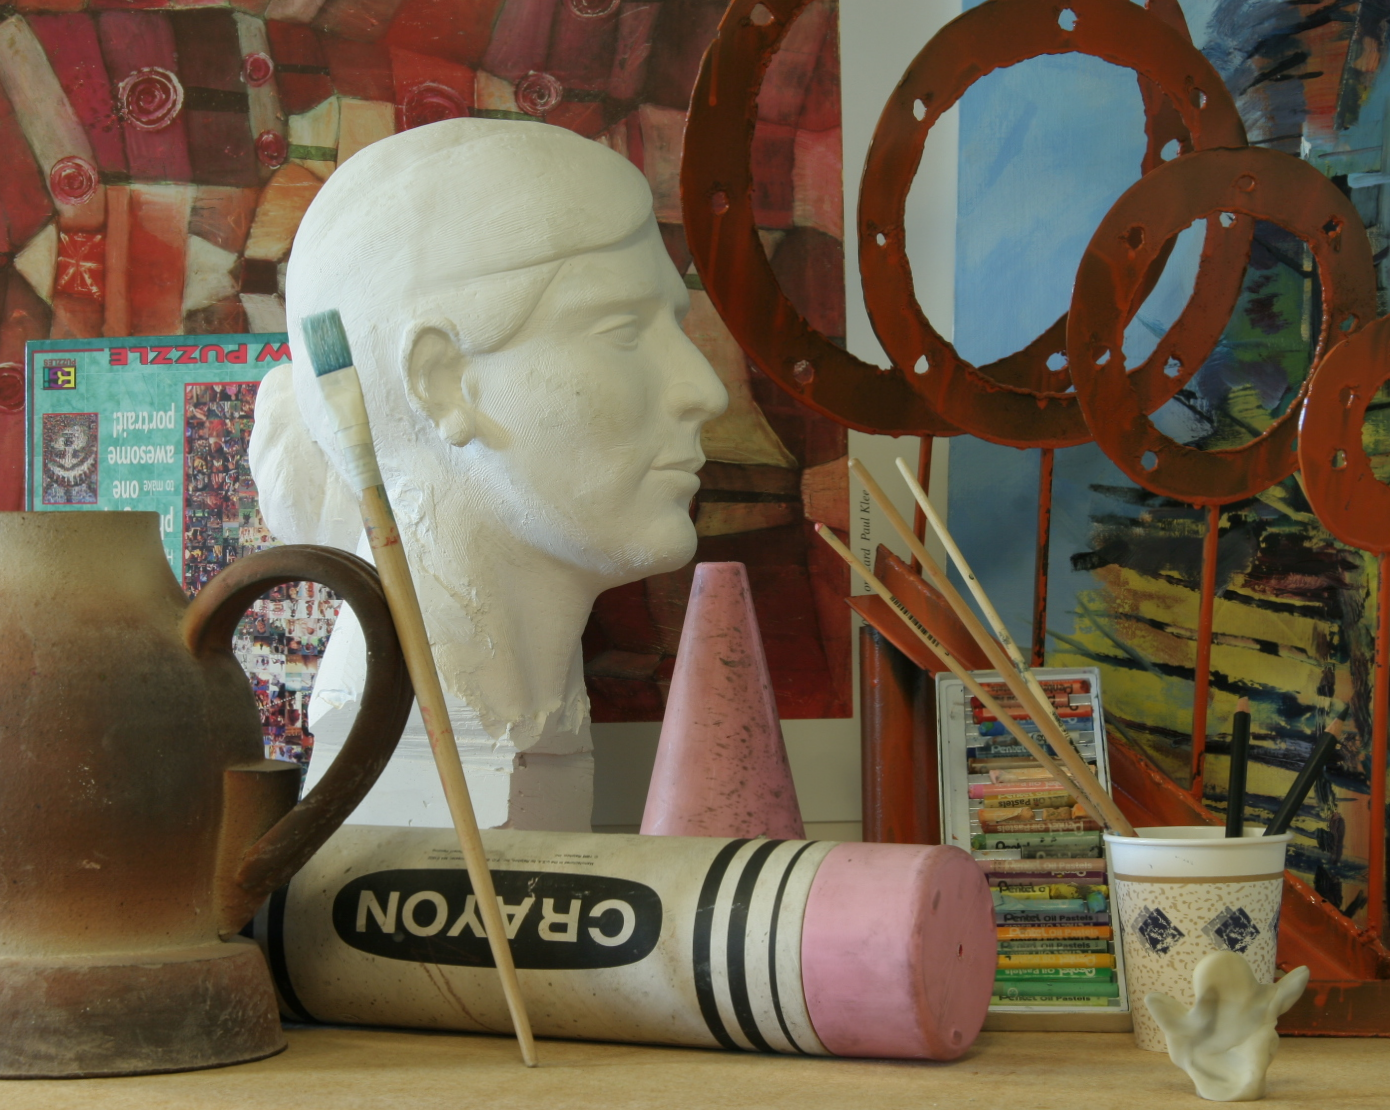

In [8]:
!git clone https://github.com/melzismn/ComputerRobotVision local_dir
from PIL import Image
Image.open('local_dir/images/stereo/left.png')


# Fast version

In [12]:
imgL = cv2.imread('local_dir/images/stereo/left.png')
imgR = cv2.imread('local_dir/images/stereo/right.png')
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

error: ignored

# Prepare world and image points

['local_dir/images/zhang2/left03.jpg', 'local_dir/images/zhang2/right14.jpg', 'local_dir/images/zhang2/right02.jpg', 'local_dir/images/zhang2/right01.jpg', 'local_dir/images/zhang2/left02.jpg', 'local_dir/images/zhang2/left01.jpg', 'local_dir/images/zhang2/left14.jpg', 'local_dir/images/zhang2/right03.jpg']
local_dir/images/zhang2/left03.jpg
True


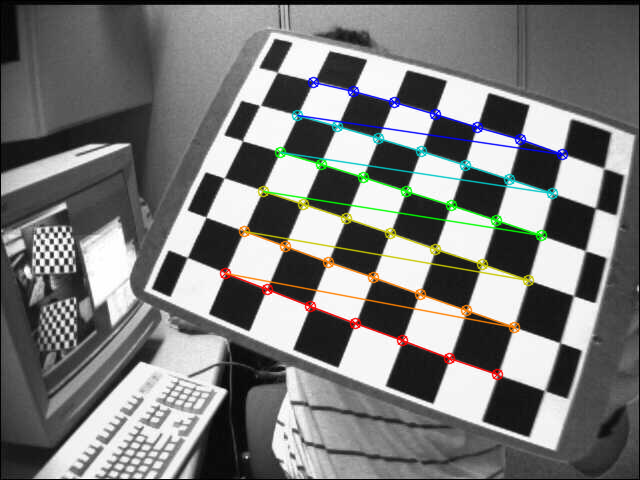

local_dir/images/zhang2/right14.jpg
True


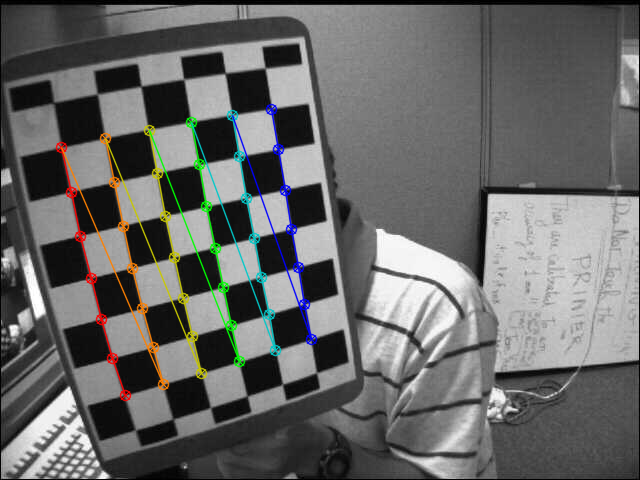

local_dir/images/zhang2/right02.jpg
False


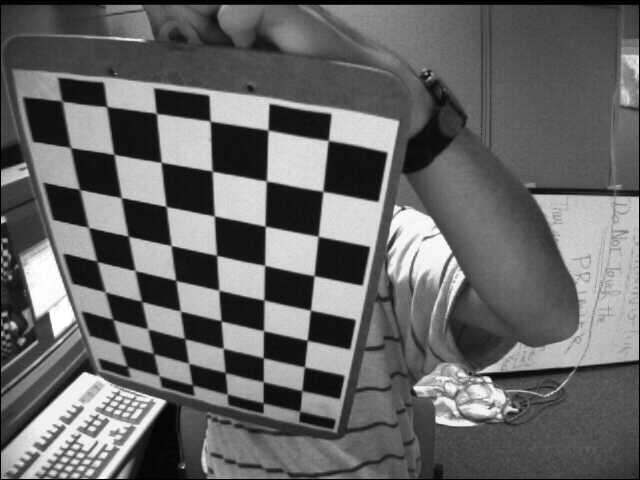

local_dir/images/zhang2/right01.jpg
True


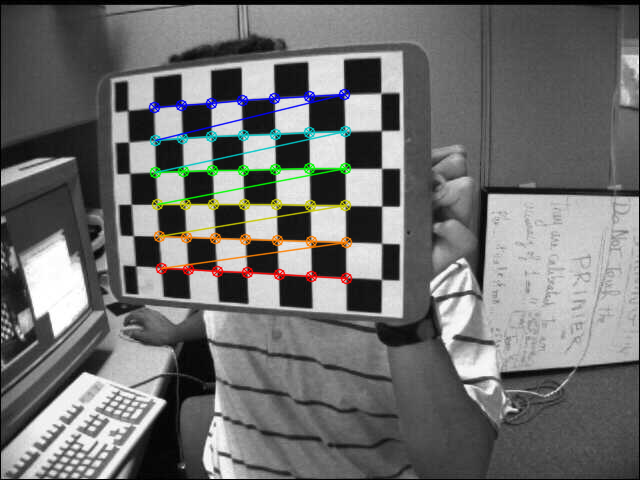

local_dir/images/zhang2/left02.jpg
True


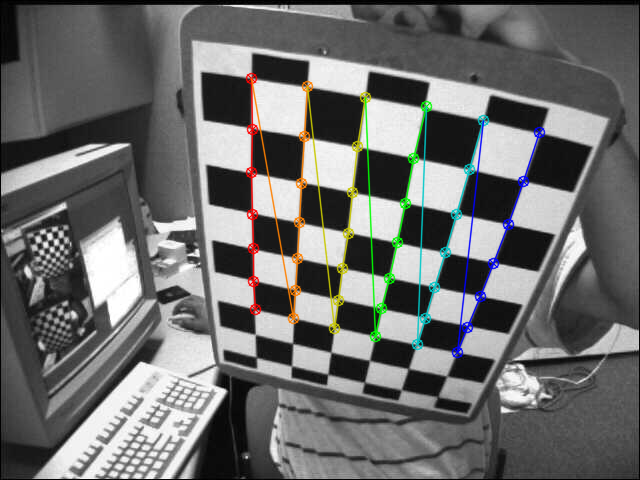

local_dir/images/zhang2/left01.jpg
True


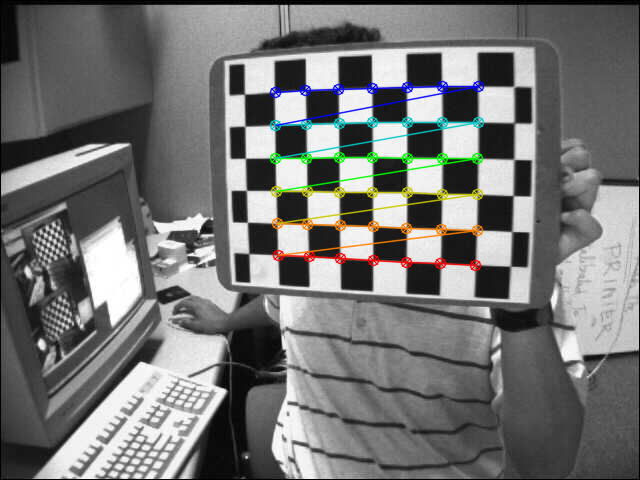

local_dir/images/zhang2/left14.jpg
True


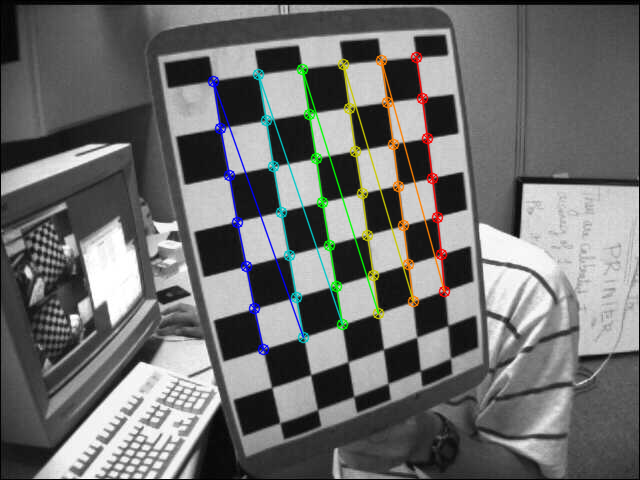

local_dir/images/zhang2/right03.jpg
True


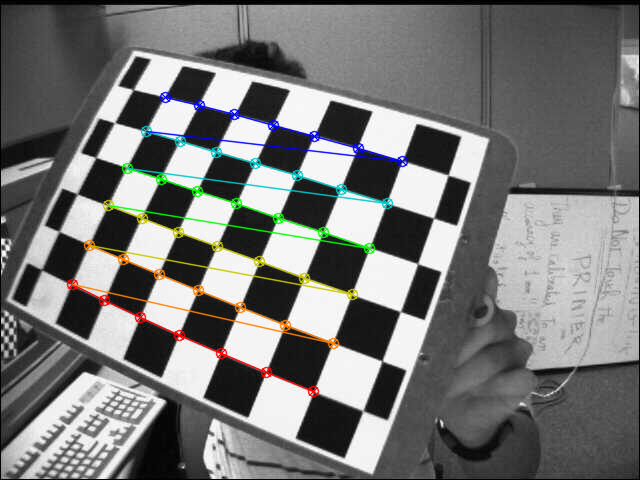

In [ ]:
world_points = [] 
image_points = [] 

images = glob.glob('local_dir/images/zhang2/*.jpg')
print(images)

image_size = None
used_images = []

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #Troviamo i punti immagine
    print(fname)
    ret, corners = cv2.findChessboardCorners(gray, size)
    print(ret)
    if ret == True:
        used_images.append(img)
        image_size = gray.shape[::-1]
        image_points.append(corners)
        world_points.append(chess_points)

    img = cv2.drawChessboardCorners(img, size, corners,ret)
    cv2_imshow(img)
    cv2.waitKey(1000)


# Calibriamo con il codice di cv2

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(world_points, image_points, image_size, None, None)
print(f'{ret} - {mtx} - {dist} - {rvecs} - {tvecs}')


0.38820597664886325 - [[534.12712444   0.         331.59413076]
 [  0.         534.21246642 239.83519461]
 [  0.           0.           1.        ]] - [[-3.07528630e-01  1.79686394e-01  3.19179676e-05 -1.28805765e-03
  -9.93737817e-02]] - (array([[-0.28800512],
       [-0.37622559],
       [-2.74440124]]), array([[ 0.4937332 ],
       [-0.18945892],
       [-1.73554541]]), array([[-0.42152332],
       [ 0.24822786],
       [-3.0955225 ]]), array([[ 0.4110314 ],
       [ 0.67808215],
       [-1.33972503]]), array([[-0.45710747],
       [ 0.26527863],
       [-3.08312932]]), array([[-0.15039179],
       [-0.46170758],
       [ 1.34524995]]), array([[-0.26496924],
       [-0.40242002],
       [-2.75350579]])) - (array([[3.2219882 ],
       [2.6141365 ],
       [9.85460379]]), array([[-5.01466564],
       [ 3.75678459],
       [12.00463359]]), array([[ 0.40227635],
       [ 1.04541223],
       [14.75535037]]), array([[-1.88249428],
       [ 1.68619591],
       [12.87582442]]), array([[ 4.0

# Testiamo l'errore di proiezione

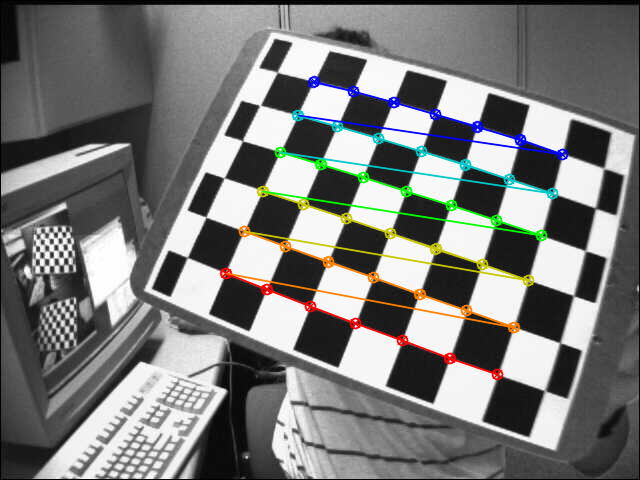

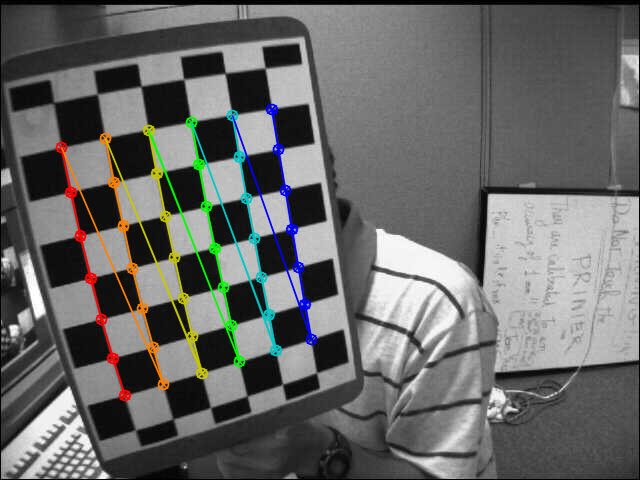

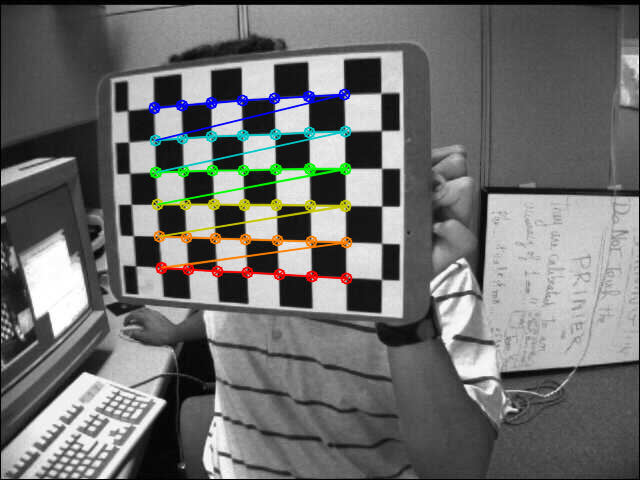

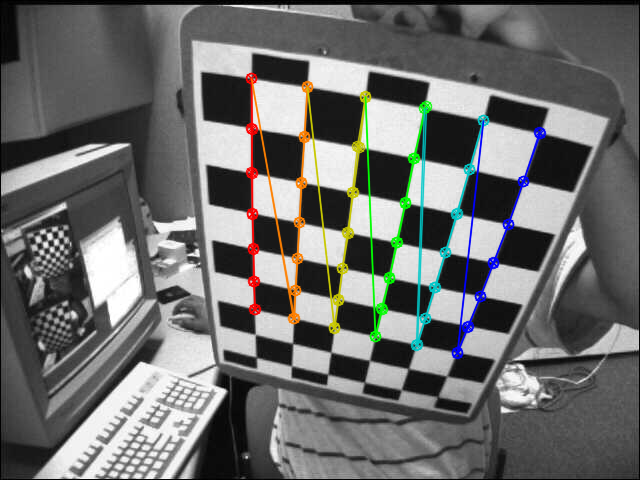

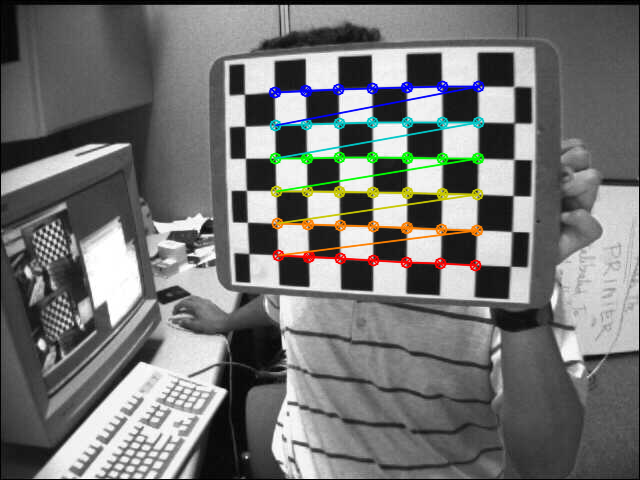

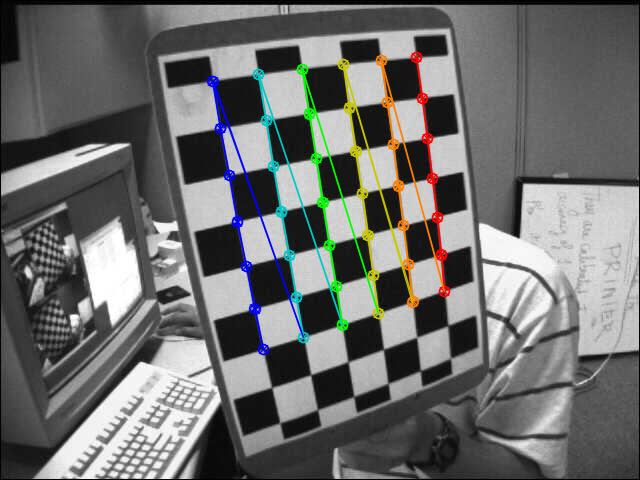

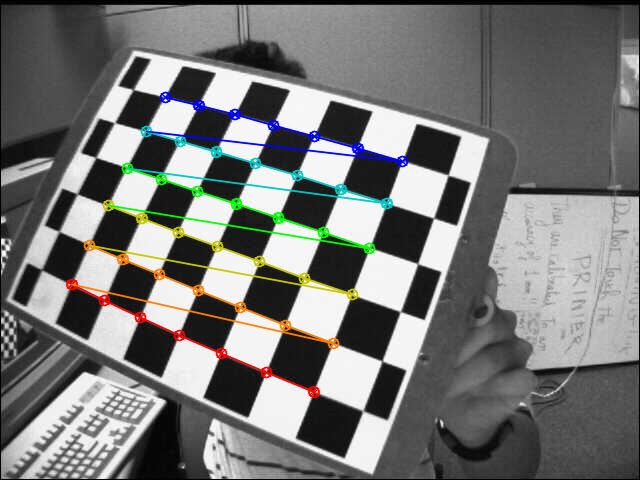

total error:  16.43968261017681


In [ ]:
tot_error = 0

for i in range(len(world_points)):
    #Proiettiamo i punti mondo sull'immagine, usando la calibrazione appena calcolata
    image_points_proj, _ = cv2.projectPoints(world_points[i], rvecs[i], tvecs[i], mtx, dist)

    #Calcoliamo l'errore di riproiezione
    error = cv2.norm(image_points[i],image_points_proj, cv2.NORM_L2)
    tot_error += error
    img = cv2.drawChessboardCorners(used_images[i], size, image_points_proj,True)
    cv2_imshow(img)
    cv2.waitKey(1000)


print (f'total error:  {tot_error}')


cv2.destroyAllWindows()